## Imports

In [1]:
%env TF_FORCE_UNIFIED_MEMORY=1

env: TF_FORCE_UNIFIED_MEMORY=1


In [11]:
import time
from jax import random
import dataset_sines_infinite
import dataset_sines_finite
import dataset_lines_infinite
import dataset_quads_infinite
import test
import plots
import ntk
import nll
from jax import numpy as np

import pickle
import models
import utils
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score

from jax.lax import scan
from jax import grad
from jax.tree_util import tree_map
from functools import partial

In [12]:
key = random.PRNGKey(0)

2022-08-27 14:35:10.648292: W external/org_tensorflow/tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /state/partition1/llgrid/pkg/anaconda/anaconda3-2022a/pkgs/cudatoolkit-11.3.1-h2bc3f7f_2/lib
2022-08-27 14:35:10.648337: W external/org_tensorflow/tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)


In [13]:
def ci95(array):
    sample_std = np.std(array)
    sample_size = array.shape[0]
    return 0.95 * sample_std / np.sqrt(sample_size)

## Loading results

In [14]:
with open("logs_final/fim_infinite.pickle", "rb") as handle:
    output_fim_infinite = pickle.load(handle)

In [15]:
with open("logs_final/fim_finite.pickle", "rb") as handle:
    output_fim_finite = pickle.load(handle)

In [16]:
with open("logs_final/random_infinite.pickle", "rb") as handle:
    output_random_infinite = pickle.load(handle)
with open("logs_final/random_infinite2.pickle", "rb") as handle:
    output_random_infinite2 = pickle.load(handle)
with open("logs_final/random_infinite3.pickle", "rb") as handle:
    output_random_infinite3 = pickle.load(handle)
with open("logs_final/random_infinite4.pickle", "rb") as handle:
    output_random_infinite4 = pickle.load(handle)
with open("logs_final/random_infinite5.pickle", "rb") as handle:
    output_random_infinite5 = pickle.load(handle)

In [17]:
with open("logs_final/random_finite.pickle", "rb") as handle:
    output_random_finite = pickle.load(handle)
with open("logs_final/random_finite2.pickle", "rb") as handle:
    output_random_finite2 = pickle.load(handle)
with open("logs_final/random_finite3.pickle", "rb") as handle:
    output_random_finite3 = pickle.load(handle)
with open("logs_final/random_finite4.pickle", "rb") as handle:
    output_random_finite4 = pickle.load(handle)
with open("logs_final/random_finite5.pickle", "rb") as handle:
    output_random_finite5 = pickle.load(handle)

In [18]:
with open("logs_final/identity_infinite.pickle", "rb") as handle:
    output_identity_infinite = pickle.load(handle)

In [19]:
with open("logs_final/identity_finite.pickle", "rb") as handle:
    output_identity_finite = pickle.load(handle)

In [20]:
with open("logs_final/maml_single_infinite.pickle", "rb") as handle:
    output_maml_infinite = pickle.load(handle)

In [21]:
with open("logs_final/maml_single_finite.pickle", "rb") as handle:
    output_maml_finite = pickle.load(handle)

## Loading network

In [22]:
model = models.small_network(40, "relu", 1)
apply_fn = utils.apply_fn_wrapper(model.apply, False)

## Computing kernels

In [24]:
kernel_fim_infinite, kernel_self_fim_infinite, jac_fim_infinite = ntk.get_kernel_and_jac_lowdim_cov(apply_fn, output_fim_infinite["trained_params"], output_fim_infinite["trained_scale"], output_fim_infinite["trained_batch_stats"], output_fim_infinite["proj"])
kernel_fim_finite, kernel_self_fim_finite, jac_fim_finite = ntk.get_kernel_and_jac_lowdim_cov(apply_fn, output_fim_finite["trained_params"], output_fim_finite["trained_scale"], output_fim_finite["trained_batch_stats"], output_fim_finite["proj"])

kernel_random_infinite, kernel_self_random_infinite, jac_random_infinite = ntk.get_kernel_and_jac_lowdim_cov(apply_fn, output_random_infinite["trained_params"], output_random_infinite["trained_scale"], output_random_infinite["trained_batch_stats"], output_random_infinite["proj"])
kernel_random_finite, kernel_self_random_finite, jac_random_finite = ntk.get_kernel_and_jac_lowdim_cov(apply_fn, output_random_finite["trained_params"], output_random_finite["trained_scale"], output_random_finite["trained_batch_stats"], output_random_finite["proj"])

kernel_random_infinite2, kernel_self_random_infinite2, jac_random_infinite2 = ntk.get_kernel_and_jac_lowdim_cov(apply_fn, output_random_infinite2["trained_params"], output_random_infinite2["trained_scale"], output_random_infinite2["trained_batch_stats"], output_random_infinite2["proj"])
kernel_random_finite2, kernel_self_random_finite2, jac_random_finite2 = ntk.get_kernel_and_jac_lowdim_cov(apply_fn, output_random_finite2["trained_params"], output_random_finite2["trained_scale"], output_random_finite2["trained_batch_stats"], output_random_finite2["proj"])

kernel_random_infinite3, kernel_self_random_infinite3, jac_random_infinite3 = ntk.get_kernel_and_jac_lowdim_cov(apply_fn, output_random_infinite3["trained_params"], output_random_infinite3["trained_scale"], output_random_infinite3["trained_batch_stats"], output_random_infinite3["proj"])
kernel_random_finite3, kernel_self_random_finite3, jac_random_finite3 = ntk.get_kernel_and_jac_lowdim_cov(apply_fn, output_random_finite3["trained_params"], output_random_finite3["trained_scale"], output_random_finite3["trained_batch_stats"], output_random_finite3["proj"])

kernel_random_infinite4, kernel_self_random_infinite4, jac_random_infinite4 = ntk.get_kernel_and_jac_lowdim_cov(apply_fn, output_random_infinite4["trained_params"], output_random_infinite4["trained_scale"], output_random_infinite4["trained_batch_stats"], output_random_infinite4["proj"])
kernel_random_finite4, kernel_self_random_finite4, jac_random_finite4 = ntk.get_kernel_and_jac_lowdim_cov(apply_fn, output_random_finite4["trained_params"], output_random_finite4["trained_scale"], output_random_finite4["trained_batch_stats"], output_random_finite4["proj"])

kernel_random_infinite5, kernel_self_random_infinite5, jac_random_infinite5 = ntk.get_kernel_and_jac_lowdim_cov(apply_fn, output_random_infinite5["trained_params"], output_random_infinite5["trained_scale"], output_random_infinite5["trained_batch_stats"], output_random_infinite5["proj"])
kernel_random_finite5, kernel_self_random_finite5, jac_random_finite5 = ntk.get_kernel_and_jac_lowdim_cov(apply_fn, output_random_finite5["trained_params"], output_random_finite5["trained_scale"], output_random_finite5["trained_batch_stats"], output_random_finite5["proj"])

In [26]:
kernel_identity_infinite, kernel_self_identity_infinite, jac_identity_infinite = ntk.get_kernel_and_jac_identity_cov(apply_fn, output_identity_infinite["intermediate_params"], output_identity_infinite["intermediate_batch_stats"])
kernel_identity_finite, kernel_self_identity_finite, jac_identity_finite = ntk.get_kernel_and_jac_identity_cov(apply_fn, output_identity_finite["intermediate_params"], output_identity_finite["intermediate_batch_stats"])

## AUC

In [27]:
def true_score_single(nll_sines, nll_lines, nll_quad):
    y_true = np.ones( (nll_sines.shape[0] + nll_lines.shape[0] + nll_quad.shape[0]) )
    y_true = y_true.at[:nll_sines.shape[0]].set(np.array([0]*nll_sines.shape[0]))

    y_score = np.append(nll_sines, nll_lines)
    y_score = np.append(y_score, nll_quad)

    return y_true, y_score

def compute_auc(nll_sines, nll_lines, nll_quad):
    y_true, y_score = true_score_single(nll_sines, nll_lines, nll_quad)
    return roc_auc_score(y_true, y_score)

In [31]:
def auc_f_K(key, min_K, max_K):
    Ks = range(min_K, max_K)
    aucs_fim_infinite = []
    aucs_fim_finite = []
    aucs_identity_infinite = []
    aucs_identity_finite = []
    
    aucs_random_infinite = []
    aucs_random_finite = []
    aucs_random_infinite2 = []
    aucs_random_finite2 = []
    aucs_random_infinite3 = []
    aucs_random_finite3 = []
    aucs_random_infinite4 = []
    aucs_random_finite4 = []
    aucs_random_infinite5 = []
    aucs_random_finite5 = []

    for K in Ks:
        print(f"Computation for K={K}")
        key, subkey_1, subkey_2, subkey_3 = random.split(key, 4)
        nll_sine_fim_infinite = test.test_nll_one_kernel(subkey_1, kernel_self_fim_infinite, jac_fim_infinite, dataset_sines_infinite.get_test_batch, K=K, n_tasks=1000, data_noise=0.05, maddox_noise=0.05, current_mean=output_fim_infinite["trained_mean"])
        nll_sine_fim_finite = test.test_nll_one_kernel(subkey_1, kernel_self_fim_finite, jac_fim_finite, dataset_sines_infinite.get_test_batch, K=K, n_tasks=1000, data_noise=0.05, maddox_noise=0.05, current_mean=output_fim_finite["trained_mean"])
        nll_sine_identity_infinite = test.test_nll_one_kernel(subkey_1, kernel_self_identity_infinite, jac_identity_infinite, dataset_sines_infinite.get_test_batch, K=K, n_tasks=1000, data_noise=0.05, maddox_noise=0.05, current_mean=output_identity_infinite["intermediate_mean"])
        nll_sine_identity_finite = test.test_nll_one_kernel(subkey_1, kernel_self_identity_finite, jac_identity_finite, dataset_sines_infinite.get_test_batch, K=K, n_tasks=1000, data_noise=0.05, maddox_noise=0.05, current_mean=output_identity_finite["intermediate_mean"])
        nll_sine_random_infinite = test.test_nll_one_kernel(subkey_1, kernel_self_random_infinite, jac_random_infinite, dataset_sines_infinite.get_test_batch, K=K, n_tasks=1000, data_noise=0.05, maddox_noise=0.05, current_mean=output_random_infinite["trained_mean"])
        nll_sine_random_finite = test.test_nll_one_kernel(subkey_1, kernel_self_random_finite, jac_random_finite, dataset_sines_infinite.get_test_batch, K=K, n_tasks=1000, data_noise=0.05, maddox_noise=0.05, current_mean=output_random_finite["trained_mean"])
        nll_sine_random_infinite2 = test.test_nll_one_kernel(subkey_1, kernel_self_random_infinite2, jac_random_infinite2, dataset_sines_infinite.get_test_batch, K=K, n_tasks=1000, data_noise=0.05, maddox_noise=0.05, current_mean=output_random_infinite2["trained_mean"])
        nll_sine_random_finite2 = test.test_nll_one_kernel(subkey_1, kernel_self_random_finite2, jac_random_finite2, dataset_sines_infinite.get_test_batch, K=K, n_tasks=1000, data_noise=0.05, maddox_noise=0.05, current_mean=output_random_finite2["trained_mean"])
        nll_sine_random_infinite3 = test.test_nll_one_kernel(subkey_1, kernel_self_random_infinite3, jac_random_infinite3, dataset_sines_infinite.get_test_batch, K=K, n_tasks=1000, data_noise=0.05, maddox_noise=0.05, current_mean=output_random_infinite3["trained_mean"])
        nll_sine_random_finite3 = test.test_nll_one_kernel(subkey_1, kernel_self_random_finite3, jac_random_finite3, dataset_sines_infinite.get_test_batch, K=K, n_tasks=1000, data_noise=0.05, maddox_noise=0.05, current_mean=output_random_finite3["trained_mean"])
        nll_sine_random_infinite4 = test.test_nll_one_kernel(subkey_1, kernel_self_random_infinite4, jac_random_infinite4, dataset_sines_infinite.get_test_batch, K=K, n_tasks=1000, data_noise=0.05, maddox_noise=0.05, current_mean=output_random_infinite4["trained_mean"])
        nll_sine_random_finite4 = test.test_nll_one_kernel(subkey_1, kernel_self_random_finite4, jac_random_finite4, dataset_sines_infinite.get_test_batch, K=K, n_tasks=1000, data_noise=0.05, maddox_noise=0.05, current_mean=output_random_finite4["trained_mean"])
        nll_sine_random_infinite5 = test.test_nll_one_kernel(subkey_1, kernel_self_random_infinite5, jac_random_infinite5, dataset_sines_infinite.get_test_batch, K=K, n_tasks=1000, data_noise=0.05, maddox_noise=0.05, current_mean=output_random_infinite5["trained_mean"])
        nll_sine_random_finite5 = test.test_nll_one_kernel(subkey_1, kernel_self_random_finite5, jac_random_finite5, dataset_sines_infinite.get_test_batch, K=K, n_tasks=1000, data_noise=0.05, maddox_noise=0.05, current_mean=output_random_finite5["trained_mean"])
        
        nll_line_fim_infinite = test.test_nll_one_kernel(subkey_1, kernel_self_fim_infinite, jac_fim_infinite, dataset_lines_infinite.get_test_batch, K=K, n_tasks=1000, data_noise=0.05, maddox_noise=0.05, current_mean=output_fim_infinite["trained_mean"])
        nll_line_fim_finite = test.test_nll_one_kernel(subkey_1, kernel_self_fim_finite, jac_fim_finite, dataset_lines_infinite.get_test_batch, K=K, n_tasks=1000, data_noise=0.05, maddox_noise=0.05, current_mean=output_fim_finite["trained_mean"])
        nll_line_identity_infinite = test.test_nll_one_kernel(subkey_1, kernel_self_identity_infinite, jac_identity_infinite, dataset_lines_infinite.get_test_batch, K=K, n_tasks=1000, data_noise=0.05, maddox_noise=0.05, current_mean=output_identity_infinite["intermediate_mean"])
        nll_line_identity_finite = test.test_nll_one_kernel(subkey_1, kernel_self_identity_finite, jac_identity_finite, dataset_lines_infinite.get_test_batch, K=K, n_tasks=1000, data_noise=0.05, maddox_noise=0.05, current_mean=output_identity_finite["intermediate_mean"])
        nll_line_random_infinite = test.test_nll_one_kernel(subkey_1, kernel_self_random_infinite, jac_random_infinite, dataset_lines_infinite.get_test_batch, K=K, n_tasks=1000, data_noise=0.05, maddox_noise=0.05, current_mean=output_random_infinite["trained_mean"])
        nll_line_random_finite = test.test_nll_one_kernel(subkey_1, kernel_self_random_finite, jac_random_finite, dataset_lines_infinite.get_test_batch, K=K, n_tasks=1000, data_noise=0.05, maddox_noise=0.05, current_mean=output_random_finite["trained_mean"])
        nll_line_random_infinite2 = test.test_nll_one_kernel(subkey_1, kernel_self_random_infinite2, jac_random_infinite2, dataset_lines_infinite.get_test_batch, K=K, n_tasks=1000, data_noise=0.05, maddox_noise=0.05, current_mean=output_random_infinite2["trained_mean"])
        nll_line_random_finite2 = test.test_nll_one_kernel(subkey_1, kernel_self_random_finite2, jac_random_finite2, dataset_lines_infinite.get_test_batch, K=K, n_tasks=1000, data_noise=0.05, maddox_noise=0.05, current_mean=output_random_finite2["trained_mean"])
        nll_line_random_infinite3 = test.test_nll_one_kernel(subkey_1, kernel_self_random_infinite3, jac_random_infinite3, dataset_lines_infinite.get_test_batch, K=K, n_tasks=1000, data_noise=0.05, maddox_noise=0.05, current_mean=output_random_infinite3["trained_mean"])
        nll_line_random_finite3 = test.test_nll_one_kernel(subkey_1, kernel_self_random_finite3, jac_random_finite3, dataset_lines_infinite.get_test_batch, K=K, n_tasks=1000, data_noise=0.05, maddox_noise=0.05, current_mean=output_random_finite3["trained_mean"])
        nll_line_random_infinite4 = test.test_nll_one_kernel(subkey_1, kernel_self_random_infinite4, jac_random_infinite4, dataset_lines_infinite.get_test_batch, K=K, n_tasks=1000, data_noise=0.05, maddox_noise=0.05, current_mean=output_random_infinite4["trained_mean"])
        nll_line_random_finite4 = test.test_nll_one_kernel(subkey_1, kernel_self_random_finite4, jac_random_finite4, dataset_lines_infinite.get_test_batch, K=K, n_tasks=1000, data_noise=0.05, maddox_noise=0.05, current_mean=output_random_finite4["trained_mean"])
        nll_line_random_infinite5 = test.test_nll_one_kernel(subkey_1, kernel_self_random_infinite5, jac_random_infinite5, dataset_lines_infinite.get_test_batch, K=K, n_tasks=1000, data_noise=0.05, maddox_noise=0.05, current_mean=output_random_infinite5["trained_mean"])
        nll_line_random_finite5 = test.test_nll_one_kernel(subkey_1, kernel_self_random_finite5, jac_random_finite5, dataset_lines_infinite.get_test_batch, K=K, n_tasks=1000, data_noise=0.05, maddox_noise=0.05, current_mean=output_random_finite5["trained_mean"])
        
        nll_quad_fim_infinite = test.test_nll_one_kernel(subkey_1, kernel_self_fim_infinite, jac_fim_infinite, dataset_quads_infinite.get_test_batch, K=K, n_tasks=1000, data_noise=0.05, maddox_noise=0.05, current_mean=output_fim_infinite["trained_mean"])
        nll_quad_fim_finite = test.test_nll_one_kernel(subkey_1, kernel_self_fim_finite, jac_fim_finite, dataset_quads_infinite.get_test_batch, K=K, n_tasks=1000, data_noise=0.05, maddox_noise=0.05, current_mean=output_fim_finite["trained_mean"])
        nll_quad_identity_infinite = test.test_nll_one_kernel(subkey_1, kernel_self_identity_infinite, jac_identity_infinite, dataset_quads_infinite.get_test_batch, K=K, n_tasks=1000, data_noise=0.05, maddox_noise=0.05, current_mean=output_identity_infinite["intermediate_mean"])
        nll_quad_identity_finite = test.test_nll_one_kernel(subkey_1, kernel_self_identity_finite, jac_identity_finite, dataset_quads_infinite.get_test_batch, K=K, n_tasks=1000, data_noise=0.05, maddox_noise=0.05, current_mean=output_identity_finite["intermediate_mean"])
        nll_quad_random_infinite = test.test_nll_one_kernel(subkey_1, kernel_self_random_infinite, jac_random_infinite, dataset_quads_infinite.get_test_batch, K=K, n_tasks=1000, data_noise=0.05, maddox_noise=0.05, current_mean=output_random_infinite["trained_mean"])
        nll_quad_random_finite = test.test_nll_one_kernel(subkey_1, kernel_self_random_finite, jac_random_finite, dataset_quads_infinite.get_test_batch, K=K, n_tasks=1000, data_noise=0.05, maddox_noise=0.05, current_mean=output_random_finite["trained_mean"])
        nll_quad_random_infinite2 = test.test_nll_one_kernel(subkey_1, kernel_self_random_infinite2, jac_random_infinite2, dataset_quads_infinite.get_test_batch, K=K, n_tasks=1000, data_noise=0.05, maddox_noise=0.05, current_mean=output_random_infinite2["trained_mean"])
        nll_quad_random_finite2 = test.test_nll_one_kernel(subkey_1, kernel_self_random_finite2, jac_random_finite2, dataset_quads_infinite.get_test_batch, K=K, n_tasks=1000, data_noise=0.05, maddox_noise=0.05, current_mean=output_random_finite2["trained_mean"])
        nll_quad_random_infinite3 = test.test_nll_one_kernel(subkey_1, kernel_self_random_infinite3, jac_random_infinite3, dataset_quads_infinite.get_test_batch, K=K, n_tasks=1000, data_noise=0.05, maddox_noise=0.05, current_mean=output_random_infinite3["trained_mean"])
        nll_quad_random_finite3 = test.test_nll_one_kernel(subkey_1, kernel_self_random_finite3, jac_random_finite3, dataset_quads_infinite.get_test_batch, K=K, n_tasks=1000, data_noise=0.05, maddox_noise=0.05, current_mean=output_random_finite3["trained_mean"])
        nll_quad_random_infinite4 = test.test_nll_one_kernel(subkey_1, kernel_self_random_infinite4, jac_random_infinite4, dataset_quads_infinite.get_test_batch, K=K, n_tasks=1000, data_noise=0.05, maddox_noise=0.05, current_mean=output_random_infinite4["trained_mean"])
        nll_quad_random_finite4 = test.test_nll_one_kernel(subkey_1, kernel_self_random_finite4, jac_random_finite4, dataset_quads_infinite.get_test_batch, K=K, n_tasks=1000, data_noise=0.05, maddox_noise=0.05, current_mean=output_random_finite4["trained_mean"])
        nll_quad_random_infinite5 = test.test_nll_one_kernel(subkey_1, kernel_self_random_infinite5, jac_random_infinite5, dataset_quads_infinite.get_test_batch, K=K, n_tasks=1000, data_noise=0.05, maddox_noise=0.05, current_mean=output_random_infinite5["trained_mean"])
        nll_quad_random_finite5 = test.test_nll_one_kernel(subkey_1, kernel_self_random_finite5, jac_random_finite5, dataset_quads_infinite.get_test_batch, K=K, n_tasks=1000, data_noise=0.05, maddox_noise=0.05, current_mean=output_random_finite5["trained_mean"])

        aucs_fim_infinite.append(compute_auc(nll_sine_fim_infinite, nll_line_fim_infinite, nll_quad_fim_infinite))
        aucs_fim_finite.append(compute_auc(nll_sine_fim_finite, nll_line_fim_finite, nll_quad_fim_finite))
        aucs_identity_infinite.append(compute_auc(nll_sine_identity_infinite, nll_line_identity_infinite, nll_quad_identity_infinite))
        aucs_identity_finite.append(compute_auc(nll_sine_identity_finite, nll_line_identity_finite, nll_quad_identity_finite))
        aucs_random_infinite.append(compute_auc(nll_sine_random_infinite, nll_line_random_infinite, nll_quad_random_infinite))
        aucs_random_finite.append(compute_auc(nll_sine_random_finite, nll_line_random_finite, nll_quad_random_finite))
        aucs_random_infinite2.append(compute_auc(nll_sine_random_infinite2, nll_line_random_infinite2, nll_quad_random_infinite2))
        aucs_random_finite2.append(compute_auc(nll_sine_random_finite2, nll_line_random_finite2, nll_quad_random_finite2))
        aucs_random_infinite3.append(compute_auc(nll_sine_random_infinite3, nll_line_random_infinite3, nll_quad_random_infinite3))
        aucs_random_finite3.append(compute_auc(nll_sine_random_finite3, nll_line_random_finite3, nll_quad_random_finite3))
        aucs_random_infinite4.append(compute_auc(nll_sine_random_infinite4, nll_line_random_infinite4, nll_quad_random_infinite4))
        aucs_random_finite4.append(compute_auc(nll_sine_random_finite4, nll_line_random_finite4, nll_quad_random_finite4))
        aucs_random_infinite5.append(compute_auc(nll_sine_random_infinite5, nll_line_random_infinite5, nll_quad_random_infinite5))
        aucs_random_finite5.append(compute_auc(nll_sine_random_finite5, nll_line_random_finite5, nll_quad_random_finite5))

    return Ks, np.array(aucs_fim_infinite), np.array(aucs_fim_finite), np.array(aucs_random_infinite), np.array(aucs_random_finite), np.array(aucs_identity_infinite), np.array(aucs_identity_finite), np.array(aucs_random_infinite2), np.array(aucs_random_finite2), np.array(aucs_random_infinite3), np.array(aucs_random_finite3), np.array(aucs_random_infinite4), np.array(aucs_random_finite4), np.array(aucs_random_infinite5), np.array(aucs_random_finite5)

In [32]:
key = random.PRNGKey(0)
Ks, aucs_fim_infinite, aucs_fim_finite, aucs_random_infinite, aucs_random_finite, aucs_identity_infinite, aucs_identity_finite, aucs_random_infinite2, aucs_random_finite2, aucs_random_infinite3, aucs_random_finite3, aucs_random_infinite4, aucs_random_finite4, aucs_random_infinite5, aucs_random_finite5 = auc_f_K(key, 1, 11)

Computation for K=1


In [19]:
aucs_random_infinite_all = np.concatenate( (aucs_random_infinite[:, np.newaxis],
                 aucs_random_infinite2[:, np.newaxis],
                 aucs_random_infinite3[:, np.newaxis],
                 aucs_random_infinite4[:, np.newaxis],
                 aucs_random_infinite5[:, np.newaxis]
                ), axis=1)

aucs_random_finite_all = np.concatenate( (aucs_random_finite[:, np.newaxis],
                 aucs_random_finite2[:, np.newaxis],
                 aucs_random_finite3[:, np.newaxis],
                 aucs_random_finite4[:, np.newaxis],
                 aucs_random_finite5[:, np.newaxis]
                ), axis=1)

In [20]:
aucs_random_infinite_means = np.mean(aucs_random_infinite_all, axis=1)
aucs_random_infinite_ci95 = []
for k in range(10):
    aucs_random_infinite_ci95.append(ci95(aucs_random_infinite_all[k]))
aucs_random_infinite_ci95 = np.array(aucs_random_infinite_ci95)

aucs_random_finite_means = np.mean(aucs_random_finite_all, axis=1)
aucs_random_finite_ci95 = []
for k in range(10):
    aucs_random_finite_ci95.append(ci95(aucs_random_finite_all[k]))
aucs_random_finite_ci95 = np.array(aucs_random_finite_ci95)

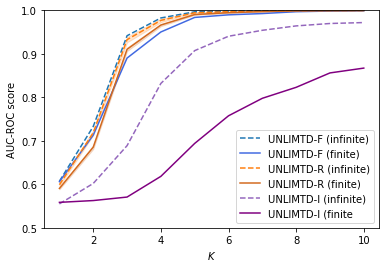

In [49]:
plt.plot(Ks, aucs_fim_infinite, "--", color="tab:blue", label="UNLIMTD-F (infinite)")
plt.plot(Ks, aucs_fim_finite, "-", color="royalblue", label="UNLIMTD-F (finite)")
plt.plot(Ks, aucs_random_infinite_means, "--", color="tab:orange", label="UNLIMTD-R (infinite)")
plt.fill_between(Ks, aucs_random_infinite_means - aucs_random_infinite_ci95, aucs_random_infinite_means + aucs_random_infinite_ci95, color="tab:orange", alpha=0.2)
plt.plot(Ks, aucs_random_finite_means, "-", color="chocolate", label="UNLIMTD-R (finite)")
plt.fill_between(Ks, aucs_random_finite_means - aucs_random_finite_ci95, aucs_random_finite_means + aucs_random_finite_ci95, color="chocolate", alpha=0.2)
plt.plot(Ks, aucs_identity_infinite, "--", color="tab:purple", label="UNLIMTD-I (infinite)")
plt.plot(Ks, aucs_identity_finite, "-", color="purple", label="UNLIMTD-I (finite")
plt.gca().set_ylim([0.5, 1])
plt.gca().set_xlabel("$K$")
plt.gca().set_ylabel("AUC-ROC score")
plt.legend()
plt.savefig("plots/single_auc.pdf", bbox_inches='tight')

## MSE

### Executing our algorithm

In [38]:
def mse_f_K(key, min_K, max_K):
    Ks = range(min_K, max_K)
    mses_fim_infinite = []
    mses_fim_finite = []
    mses_random_infinite = []
    mses_random_finite = []
    mses_identity_infinite = []
    mses_identity_finite = []
    
    ci95s_fim_infinite = []
    ci95s_fim_finite = []
    ci95s_random_infinite = []
    ci95s_random_finite = []
    ci95s_identity_infinite = []
    ci95s_identity_finite = []
    
    for K in Ks:
        print(f"Computation for K={K}")
        key, subkey_1 = random.split(key)
        
        mse_fim_infinite = test.test_error_one_kernel(subkey_1, kernel_fim_infinite, kernel_self_fim_infinite, jac_fim_infinite, dataset_sines_infinite.get_test_batch, dataset_sines_infinite.error_fn, K=K, L=100, n_tasks=1000, data_noise=0.05, maddox_noise=0.05, current_mean=output_fim_infinite["trained_mean"])
        mse_fim_finite = test.test_error_one_kernel(subkey_1, kernel_fim_finite, kernel_self_fim_finite, jac_fim_finite, dataset_sines_infinite.get_test_batch, dataset_sines_infinite.error_fn, K=K, L=100, n_tasks=1000, data_noise=0.05, maddox_noise=0.05, current_mean=output_fim_finite["trained_mean"])
        mse_identity_infinite = test.test_error_one_kernel(subkey_1, kernel_identity_infinite, kernel_self_identity_infinite, jac_identity_infinite, dataset_sines_infinite.get_test_batch, dataset_sines_infinite.error_fn, K=K, L=100, n_tasks=1000, data_noise=0.05, maddox_noise=0.05, current_mean=output_identity_infinite["intermediate_mean"])
        mse_identity_finite = test.test_error_one_kernel(subkey_1, kernel_identity_finite, kernel_self_identity_finite, jac_identity_finite, dataset_sines_infinite.get_test_batch, dataset_sines_infinite.error_fn, K=K, L=100, n_tasks=1000, data_noise=0.05, maddox_noise=0.05, current_mean=output_identity_finite["intermediate_mean"])
        mse_random_infinite = test.test_error_one_kernel(subkey_1, kernel_random_infinite, kernel_self_random_infinite, jac_random_infinite, dataset_sines_infinite.get_test_batch, dataset_sines_infinite.error_fn, K=K, L=100, n_tasks=1000, data_noise=0.05, maddox_noise=0.05, current_mean=output_random_infinite["trained_mean"])
        mse_random_finite = test.test_error_one_kernel(subkey_1, kernel_random_finite, kernel_self_random_finite, jac_random_finite, dataset_sines_infinite.get_test_batch, dataset_sines_infinite.error_fn, K=K, L=100, n_tasks=1000, data_noise=0.05, maddox_noise=0.05, current_mean=output_random_finite["trained_mean"])
        mse_random_infinite2 = test.test_error_one_kernel(subkey_1, kernel_random_infinite2, kernel_self_random_infinite2, jac_random_infinite2, dataset_sines_infinite.get_test_batch, dataset_sines_infinite.error_fn, K=K, L=100, n_tasks=1000, data_noise=0.05, maddox_noise=0.05, current_mean=output_random_infinite2["trained_mean"])
        mse_random_finite2 = test.test_error_one_kernel(subkey_1, kernel_random_finite2, kernel_self_random_finite2, jac_random_finite2, dataset_sines_infinite.get_test_batch, dataset_sines_infinite.error_fn, K=K, L=100, n_tasks=1000, data_noise=0.05, maddox_noise=0.05, current_mean=output_random_finite2["trained_mean"])
        mse_random_infinite3 = test.test_error_one_kernel(subkey_1, kernel_random_infinite3, kernel_self_random_infinite3, jac_random_infinite3, dataset_sines_infinite.get_test_batch, dataset_sines_infinite.error_fn, K=K, L=100, n_tasks=1000, data_noise=0.05, maddox_noise=0.05, current_mean=output_random_infinite3["trained_mean"])
        mse_random_finite3 = test.test_error_one_kernel(subkey_1, kernel_random_finite3, kernel_self_random_finite3, jac_random_finite3, dataset_sines_infinite.get_test_batch, dataset_sines_infinite.error_fn, K=K, L=100, n_tasks=1000, data_noise=0.05, maddox_noise=0.05, current_mean=output_random_finite3["trained_mean"])
        mse_random_infinite4 = test.test_error_one_kernel(subkey_1, kernel_random_infinite4, kernel_self_random_infinite4, jac_random_infinite4, dataset_sines_infinite.get_test_batch, dataset_sines_infinite.error_fn, K=K, L=100, n_tasks=1000, data_noise=0.05, maddox_noise=0.05, current_mean=output_random_infinite4["trained_mean"])
        mse_random_finite4 = test.test_error_one_kernel(subkey_1, kernel_random_finite4, kernel_self_random_finite4, jac_random_finite4, dataset_sines_infinite.get_test_batch, dataset_sines_infinite.error_fn, K=K, L=100, n_tasks=1000, data_noise=0.05, maddox_noise=0.05, current_mean=output_random_finite4["trained_mean"])
        mse_random_infinite5 = test.test_error_one_kernel(subkey_1, kernel_random_infinite5, kernel_self_random_infinite5, jac_random_infinite5, dataset_sines_infinite.get_test_batch, dataset_sines_infinite.error_fn, K=K, L=100, n_tasks=1000, data_noise=0.05, maddox_noise=0.05, current_mean=output_random_infinite5["trained_mean"])
        mse_random_finite5 = test.test_error_one_kernel(subkey_1, kernel_random_finite5, kernel_self_random_finite5, jac_random_finite5, dataset_sines_infinite.get_test_batch, dataset_sines_infinite.error_fn, K=K, L=100, n_tasks=1000, data_noise=0.05, maddox_noise=0.05, current_mean=output_random_finite5["trained_mean"])

        mses_fim_infinite.append(np.mean(mse_fim_infinite))
        ci95s_fim_infinite.append(ci95(mse_fim_infinite))
        
        mses_fim_finite.append(np.mean(mse_fim_finite))
        ci95s_fim_finite.append(ci95(mse_fim_finite))
        
        mse_random_infinite_all = np.concatenate( (mse_random_infinite, mse_random_infinite2, mse_random_infinite3, mse_random_infinite4, mse_random_infinite5) )
        mses_random_infinite.append(np.mean(mse_random_infinite_all))
        ci95s_random_infinite.append(ci95(mse_random_infinite_all))
        
        mse_random_finite_all = np.concatenate( (mse_random_finite, mse_random_finite2, mse_random_finite3, mse_random_finite4, mse_random_finite5) )
        mses_random_finite.append(np.mean(mse_random_finite_all))
        ci95s_random_finite.append(ci95(mse_random_finite_all))
        
        mses_identity_infinite.append(np.mean(mse_identity_infinite))
        ci95s_identity_infinite.append(ci95(mse_identity_infinite))
        
        mses_identity_finite.append(np.mean(mse_identity_finite))
        ci95s_identity_finite.append(ci95(mse_identity_finite))

    return Ks, np.array(mses_fim_infinite), np.array(ci95s_fim_infinite), np.array(mses_fim_finite), np.array(ci95s_fim_finite), np.array(mses_random_infinite), np.array(ci95s_random_infinite), np.array(mses_random_finite), np.array(ci95s_random_finite), np.array(mses_identity_infinite), np.array(ci95s_identity_infinite), np.array(mses_identity_finite), np.array(ci95s_identity_finite),

In [39]:
Ks, mses_fim_infinite, ci95s_fim_infinite, mses_fim_finite, ci95s_fim_finite, mses_random_infinite, ci95s_random_infinite, mses_random_finite, ci95s_random_finite, mses_identity_infinite, ci95s_identity_infinite, mses_identity_finite, ci95s_identity_finite = mse_f_K(key, 1, 11)

Computation for K=1


### Executing MAML

In [40]:
model = models.small_network(40, "relu", 1)

def apply_fn(params, inputs):
    return model.apply({"params": params}, inputs)

key, key_init0, key_init1 = random.split(key, 3)
batch = dataset_sines_infinite.get_test_batch(key, 10, 10, 10, 0.05)
init_vars = model.init(key_init1, batch[0][0])

In [41]:
def error_fn(predictions, gt):
    return np.mean( (predictions - gt)**2 )

def inner_loss(current_params, x_a, y_a, apply_fn):
    predictions = apply_fn(current_params, x_a)
    
    return error_fn(predictions, y_a)

def inner_updates(current_params, x_a, y_a, n_updates, inner_lr, apply_fn):
    def f(parameters, x):
        inner_gradients = grad(inner_loss)(parameters, x_a, y_a, apply_fn)
        parameters = tree_map(partial(gd_step0, inner_lr), parameters, inner_gradients)
        
        return parameters, None
    
    updated_params, _ = scan(f, current_params, None, n_updates)
    
    return updated_params

def gd_step0(inner_lr, param_value, param_grad):
    return param_value - inner_lr * param_grad

In [45]:
def test_maml(key, apply_fn, params, n_updates_test, inner_lr, n_test_tasks, K, L, noise, error_fn):
    x_a, y_a, x_b, y_b = dataset_sines_infinite.get_test_batch(key, n_test_tasks, K, L, noise)
    
    def f(carry, task):
        x_a, y_a, x_b, y_b = task
        
        updated_params = inner_updates(params, x_a, y_a, n_updates_test, inner_lr, apply_fn)
        predictions = apply_fn(updated_params, x_b)
        
        return None, error_fn(predictions, y_b)
    
    _, errors = scan(f, None, (x_a, y_a, x_b, y_b))
    return errors

In [46]:
config = output_maml_infinite["config"]

def mse_maml_f_K(key, min_K, max_K):
    Ks = range(min_K, max_K)
    mses_maml_infinite = []
    ci95s_maml_infinite = []
    mses_maml_finite = []
    ci95s_maml_finite = []
    
    for K in Ks:
        print(f"Computation for K={K}")
        key, subkey_1 = random.split(key)
        errors_infinite = test_maml(subkey_1, apply_fn, output_maml_infinite["trained_params"], config["n_updates_test"], config["inner_lr"], 1000, K, 100, 0.05, error_fn)
        errors_finite = test_maml(subkey_1, apply_fn, output_maml_finite["trained_params"], config["n_updates_test"], config["inner_lr"], 1000, K, 100, 0.05, error_fn)

        mses_maml_infinite.append(np.mean(errors_infinite))
        ci95s_maml_infinite.append(ci95(errors_infinite))
        mses_maml_finite.append(np.mean(errors_finite))
        ci95s_maml_finite.append(ci95(errors_finite))

    return Ks, np.array(mses_maml_infinite), np.array(ci95s_maml_infinite), np.array(mses_maml_finite), np.array(ci95s_maml_finite)

In [47]:
key, subkey = random.split(key)
Ks, mses_maml_infinite, ci95s_maml_infinite, mses_maml_finite, ci95s_maml_finite = mse_maml_f_K(key, 1, 11)

Computation for K=1


### Plotting

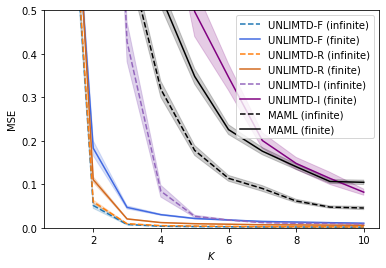

In [52]:
plt.plot(Ks, mses_fim_infinite, "--", color="tab:blue", label="UNLIMTD-F (infinite)")
plt.fill_between(Ks, mses_fim_infinite - ci95s_fim_infinite, mses_fim_infinite + ci95s_fim_infinite, color='tab:blue', alpha=0.2)
plt.plot(Ks, mses_fim_finite, "royalblue", label="UNLIMTD-F (finite)")
plt.fill_between(Ks, mses_fim_finite - ci95s_fim_finite, mses_fim_finite + ci95s_fim_finite, color='royalblue', alpha=0.2)

plt.plot(Ks, mses_random_infinite, "--", color="tab:orange", label="UNLIMTD-R (infinite)")
plt.fill_between(Ks, mses_random_infinite - ci95s_random_infinite, mses_random_infinite + ci95s_random_infinite, color='tab:orange', alpha=0.2)
plt.plot(Ks, mses_random_finite, "chocolate", label="UNLIMTD-R (finite)")
plt.fill_between(Ks, mses_random_finite - ci95s_random_finite, mses_random_finite + ci95s_random_finite, color='chocolate', alpha=0.2)

plt.plot(Ks, mses_identity_infinite, "--", color="tab:purple", label="UNLIMTD-I (infinite)")
plt.fill_between(Ks, mses_identity_infinite - ci95s_identity_infinite, mses_identity_infinite + ci95s_identity_infinite, color='tab:purple', alpha=0.3)
plt.plot(Ks, mses_identity_finite, "purple", label="UNLIMTD-I (finite)")
plt.fill_between(Ks, mses_identity_finite - ci95s_identity_finite, mses_identity_finite + ci95s_identity_finite, color='purple', alpha=0.2)

plt.plot(Ks[1:], mses_maml_infinite[1:], "k--", label="MAML (infinite)")
plt.fill_between(Ks[1:], mses_maml_infinite[1:] - ci95s_maml_infinite[1:], mses_maml_infinite[1:] + ci95s_maml_infinite[1:], color='k', alpha=0.2)
plt.plot(Ks, mses_maml_finite, "k", label="MAML (finite)")
plt.fill_between(Ks, mses_maml_finite - ci95s_maml_finite, mses_maml_finite + ci95s_maml_finite, color='k', alpha=0.2)

plt.gca().set_ylim([0, 0.5])
plt.gca().set_xlabel("$K$")
plt.gca().set_ylabel("MSE")
plt.legend()
plt.savefig("plots/single_mse.pdf", bbox_inches='tight')